# 8章　Tree-Based Methods

R 3.6.0を使用しています。

In [1]:
# Data and Libraries
rm( list = ls( envir = globalenv() ), envir = globalenv() )
library(ISLR)
library(tree)
attach(Carseats)
High = ifelse(Sales <= 8, "No", "Yes") # np.whereのような三項演算子
Carseats = data.frame(Carseats, High)

## 1. The Basics of Decision Trees

### 1. Regression Trees（回帰木）

regression treesの構築方法は，大まかに次の2ステップである。

1. 説明変数$X_1, X_2, \dots, X_p$を，重複がないように$J$個の領域$R_1, R_2, \dots, R_J$に切り分ける。
2. すべての$R_j$について，観測が$R_j$に属する場合は，$R_j$に属する訓練データの平均値を予測値として返す。

$R_j$は，RSS（残差二乗和）が最小になるようにする。($R_j$の領域については図8.3参照)
$$
\sum_{j=1}^J\sum_{i\in R_j}(y_i - \hat{y}_{R_j})^2, \tag{8.1}
$$
ここで，$\hat{y}_{R_j}$は，$R_j$に属する訓練データの平均値（すなわち，決定木による予測値）である。

具体的には，
$$
R_1(j, s) = \{ X|X_j < s \} \ and \ R_2(j, s) = \{ X|X_j \geq s \}, \tag{8.2}
$$
となるsを見つけるということ，つまり，
$$
\sum_{i: x_i \in R_1(j, s)}(y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j, s)}(y_i - \hat{y}_{R_2})^2, \tag{8.3}
$$
を最小化させるjとsの値を見つければよい。

![ Figure 8.3 ](./fig8.3.PNG "Figure 8.3")

### Tree Pruning（決定木の剪定）

上記の方法では結果が複雑になりすぎるので，バイアスを少し大きくする代わりに，分散が小さく，解釈しやすい小さい木にしたい。  
そこで，Cost complexity pruningまたはweakest link pruningと呼ばれる，木の剪定アルゴリズムがある。
$$
\sum_{m=1}^{|T|} \sum_{x_i \in R_m} (y_i - \hat{y}_{R_m})2 + \alpha |T| \tag{8.4}
$$
ここで，$T \subset T_0$で，$\alpha \geq 0$である。また，$|T|$は$T$の終端ノードの個数である。この（8.4）式をなるべく小さくすればよい。

さらに，木の剪定アルゴリズムの手順は次の通りである。

1. 各終端ノードの中の観測データの個数が一定数以下になるまで領域に分割する。
2. $\alpha$の関数として，cost complexity pruningを適用する。
3. $\alpha$を選ぶために，K個のcross validationを使う。$1 \sim K$の$K$それぞれに対し，  
    (a)ステップ1と2を，k番目のトレーニングデータ以外に適用する。  
    (b)$\alpha$の関数として，k番目のデータの二乗平均予測誤差を求める。  
    $\alpha$の平均をとり，平均誤差を最小化させる$\alpha$を選択する。
4. 選んだ$\alpha$をステップ2の関数に代入し，部分木を返す。

### 2. Classification Trees（分類木）

Regression Treesでは残差二乗和（RSS）を使っていた。一方で，Classfication Treesではそれに対応する概念として，classification error rate（$E$）(ノードにおける誤り率)が存在する。
$$
E = 1 - \max_k(\hat{p}_{mk}) \tag{8.5}
$$
ここで，$\hat{p}_{mk}$は$R_m$に含まれる観測におけるクラス$k$の比率である。  
しかし，この関数は木の成長に対して十分敏感ではないことがわかり，実際には下の2つの関数が利用される。

Gini index（ジニ係数）
$$
G = \sum_{k=1}^K \hat{p}_{mk}(1 - \hat{p}_{mk}) \tag{8.6}
$$
これは，K個のクラスの総分散を示している。$\hat{p}_{mk}$が0または1に近づくと，ジニ係数は非常に小さくなるので，ノードの不純度を示すために使用される。ジニ係数が小さければ，領域内でのクラスのばらつきが少ないということである。

ジニ係数の代わりとして，交差エントロピーまたは逸脱度と呼ばれる関数がある。
$$
D = - \sum_{k=1}^K \hat{p}_{mk} log\hat{p}_{mk} \tag{8.7}
$$
$0 \leq \hat{p}_{mk} \leq 1$なので，$0 \leq \hat{p}_{mk}$であり，m番目のノードが綺麗であれば，小さな値をとる。  
実際に，ジニ係数と数値的によく似ている。

分類木を構築する際，典型的にジニ係数か交差エントロピーが分岐の質を評価するために使用される。

### 3. Trees Versus Linear Models

線形回帰は次のような形をとる。
$$
f(X) = \beta_0 + \sum_{j=1}^p X_j \beta_j, \tag{8.8}
$$
一方，回帰木は次のような形をとる。
$$
f(X) = \sum_{m=1}^M c_m \cdot 1_{(x \in R_m)} \tag{8.9}
$$

データが線形なら線形回帰，そうでなければ決定木…という感じだが，目的に合わせることが大事である。

### 4. Advantages and Disadvantages of Trees

決定木の長所
 - 人への説明が非常にしやすい。実際に線形回帰よりも説明が楽！
 - 人の決定に近いと信じる人もいる
 - 可視化が簡単なので，専門家でなくても容易に解釈できる
 - 質的データをダミー変数無しで容易に扱える
 
決定木の短所
 - 他の回帰や分類の手法に比べて，予測精度が悪い 
 - データが少し変化しただけで，結果が大きく変わってしまう。
 
しかし，バギング，ランダムフォレスト，ブースティングといった手法を用いれば精度は上がる。

In [2]:
# Fitting Classification Trees
tree.carseats = tree(High~.-Sales, Carseats)
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

summary関数で表示される"Misclassification error rate"は，次の式から算出される。
$$
-2\sum_m \sum_k n_{mk} log \hat{p}_{mk}
$$
ここで，$$はk番目のクラスに属するm番目の観測の数である。

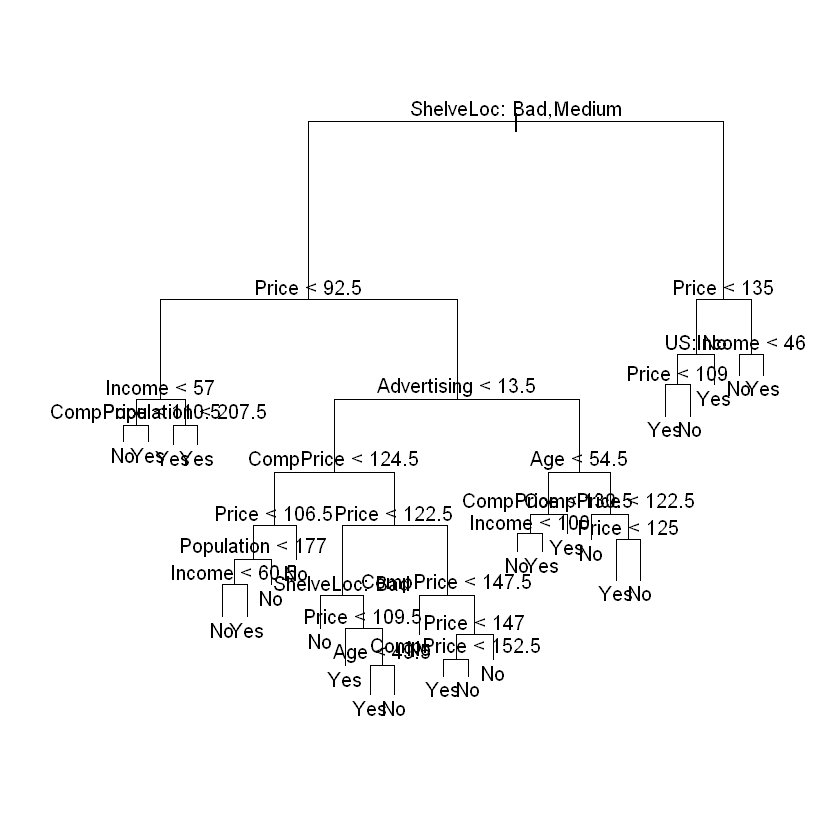

In [3]:
plot(tree.carseats)
text(tree.carseats, pretty=0) # pretty=0を付け加えるとShelveLocのBadなども表示してくれる

In [4]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [5]:
set.seed(2)
train = sample(1:nrow(Carseats), 200) # （擬似）無作為要素
Carseats.test = Carseats[-train, ]
High.test = High[-train]
tree.carseats = tree(High~.-Sales, Carseats, subset=train)
tree.pred = predict(tree.carseats, Carseats.test, type="class")
table(tree.pred, High.test) # ここでテキストと違う値が出てくる。バージョンによる乱数種が違う？

         High.test
tree.pred  No Yes
      No  104  33
      Yes  13  50

In [6]:
set.seed(3)
cv.carseats = cv.tree(tree.carseats, FUN=prune.misclass)
names(cv.carseats)
cv.carseats

[1] "size"   "dev"    "k"      "method"

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

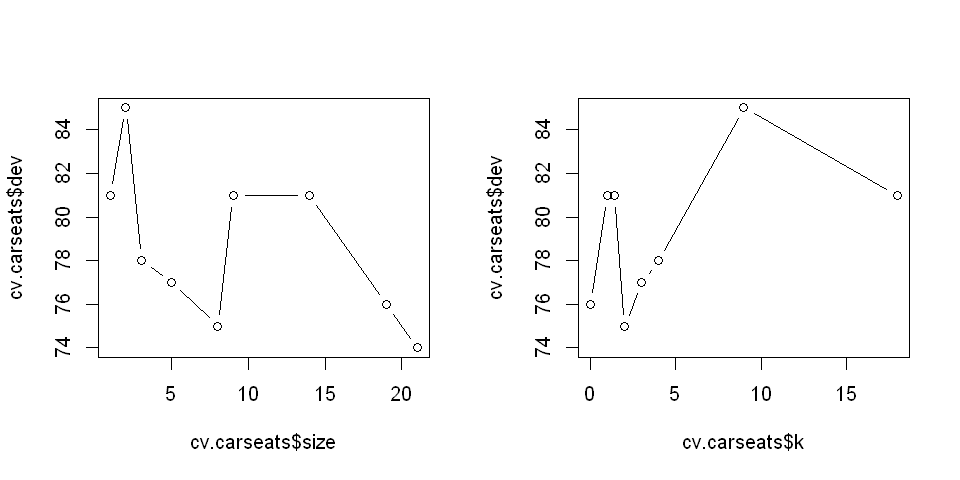

In [7]:
par(mfrow=c(1, 2))
options(repr.plot.width=8, repr.plot.height=4) # jupyter用
plot(cv.carseats$size, cv.carseats$dev, type="b")
plot(cv.carseats$k, cv.carseats$dev, type="b")

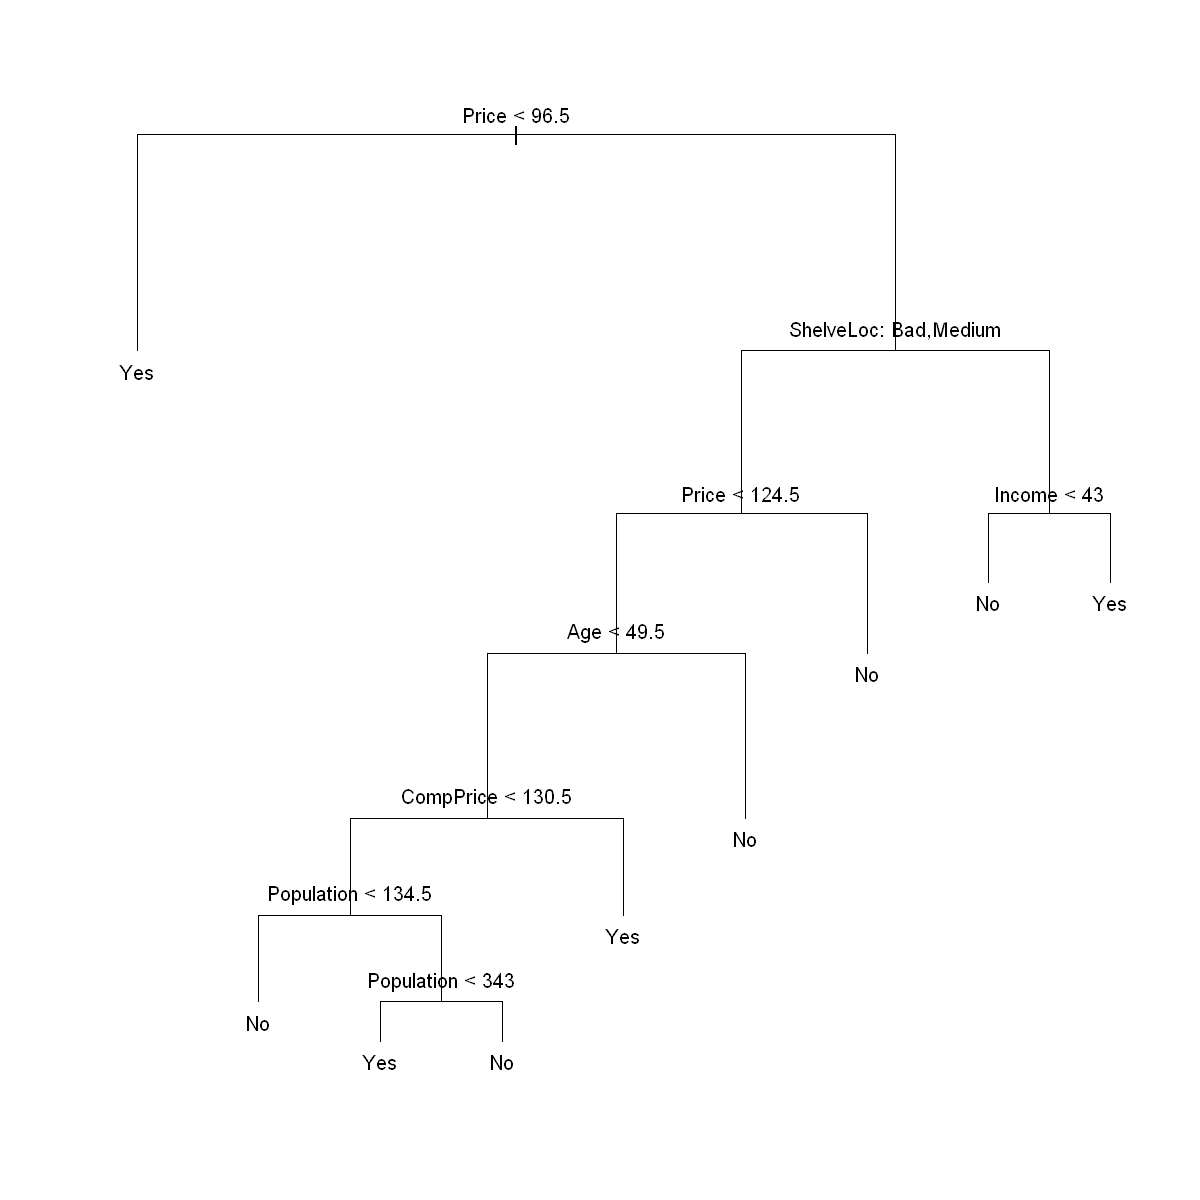

In [8]:
prune.carseats = prune.misclass(tree.carseats, best=9) # 終端ノードを9つに絞る
options(repr.plot.width=10, repr.plot.height=10) # jupyter用
plot(prune.carseats)
text(prune.carseats, pretty=0)

In [9]:
tree.pred = predict(prune.carseats, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred No Yes
      No  97  25
      Yes 20  58

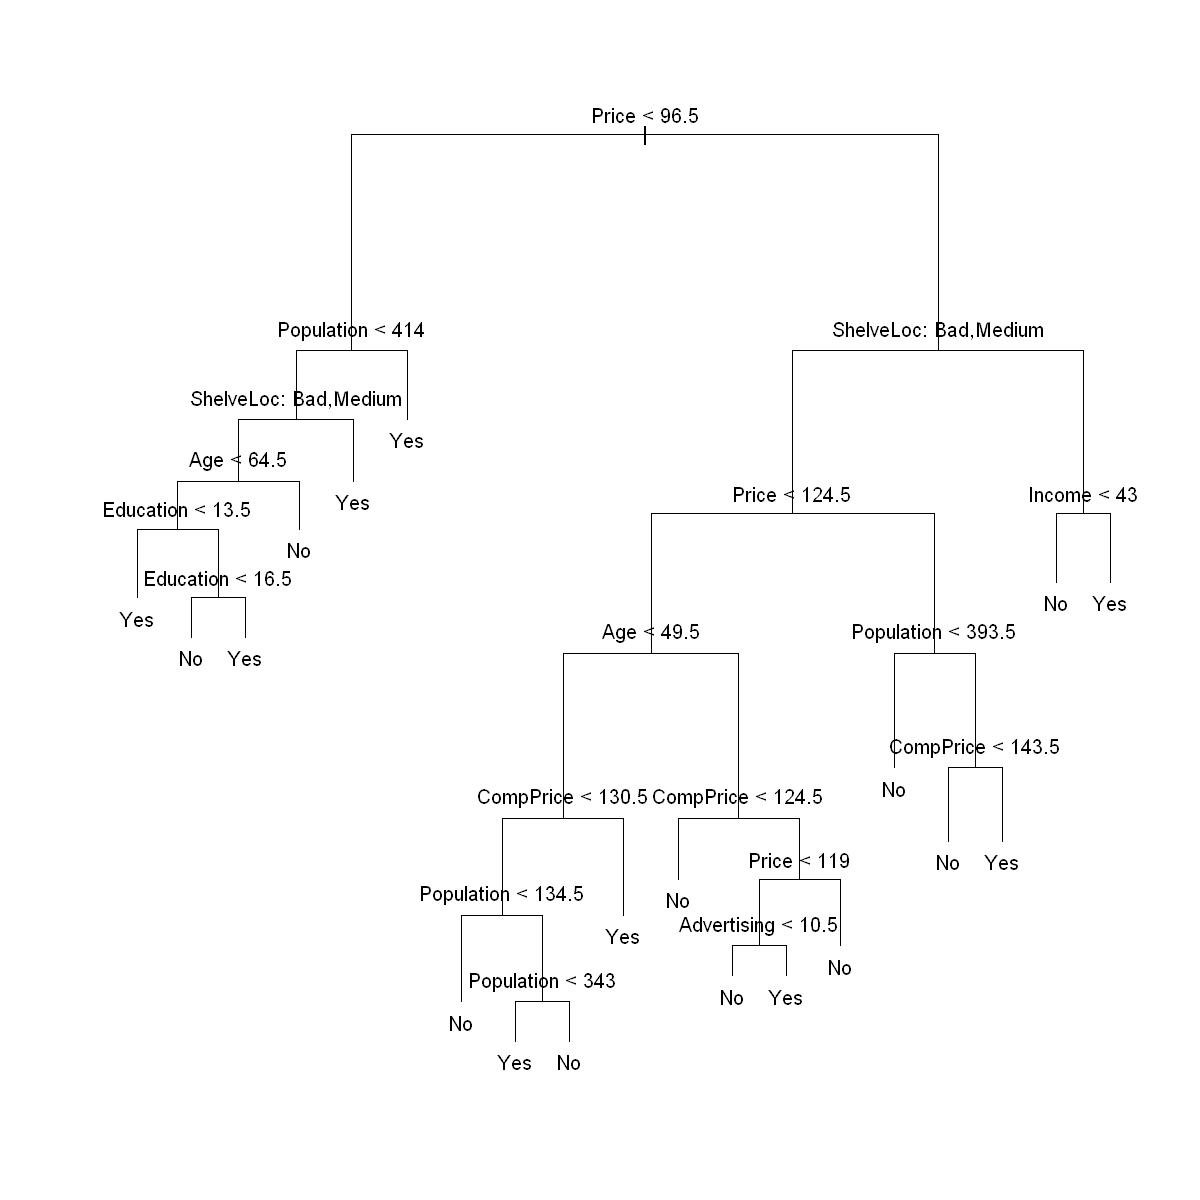

In [10]:
prune.carseats = prune.misclass(tree.carseats, best=15) # 終端ノードを15個に絞る
options(repr.plot.width=10, repr.plot.height=10) # jupyter用
plot(prune.carseats)
text(prune.carseats, pretty=0)

In [11]:
tree.pred = predict(prune.carseats, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred  No Yes
      No  102  30
      Yes  15  53

In [12]:
# Fitting Regression Trees
library(MASS) # Boston data
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston = tree(medv~., Boston, subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

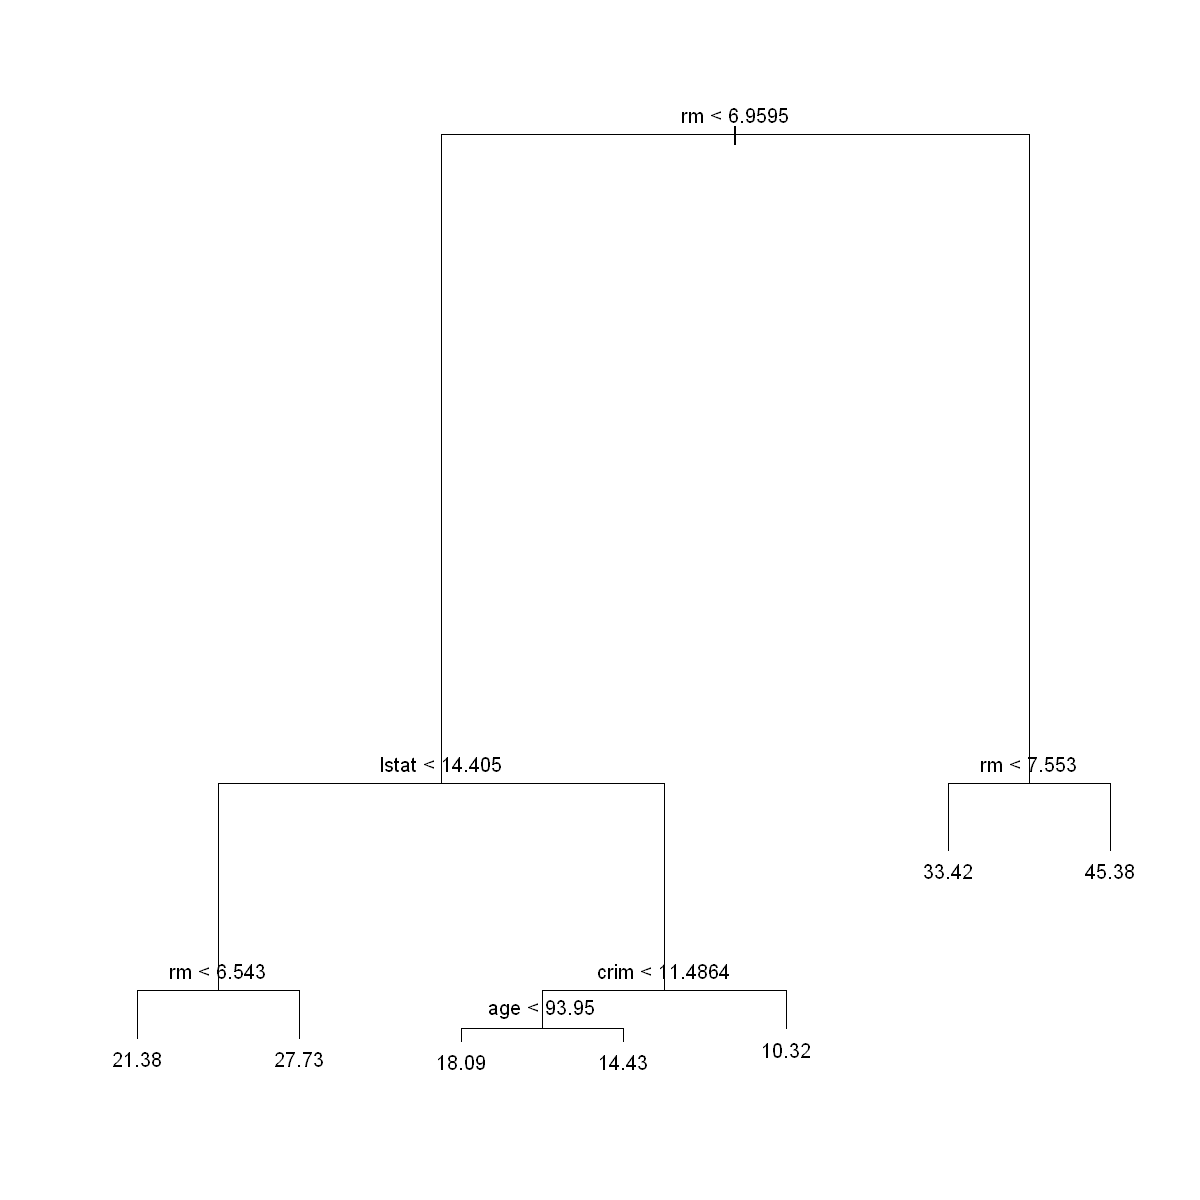

In [13]:
# tree plot
plot(tree.boston)
text(tree.boston, pretty=0)

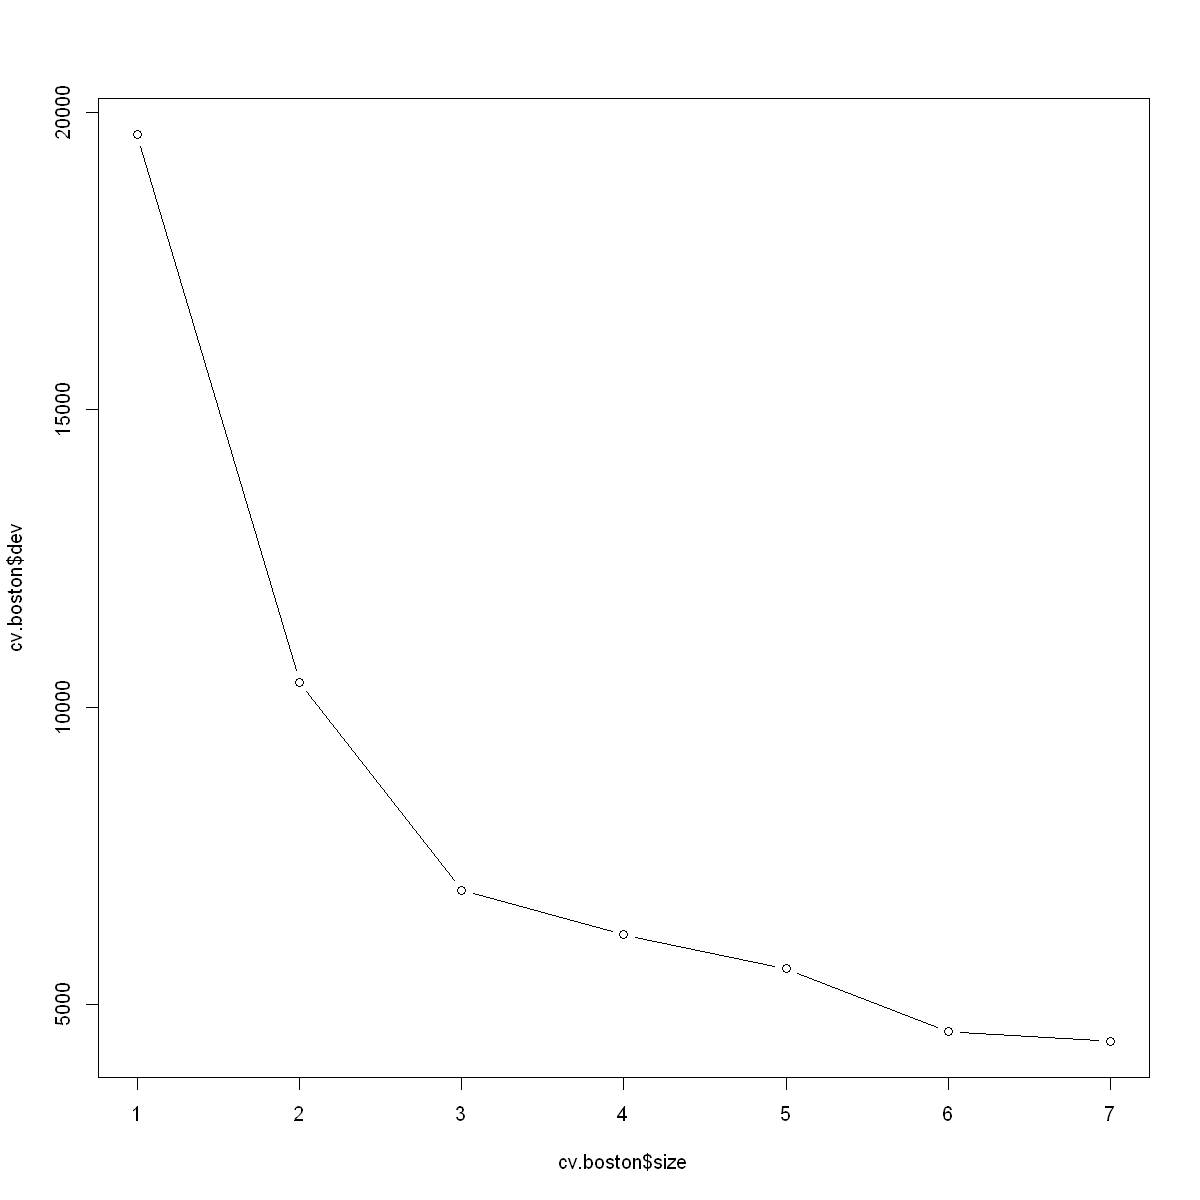

In [14]:
# cross varidation
cv.boston = cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type='b')

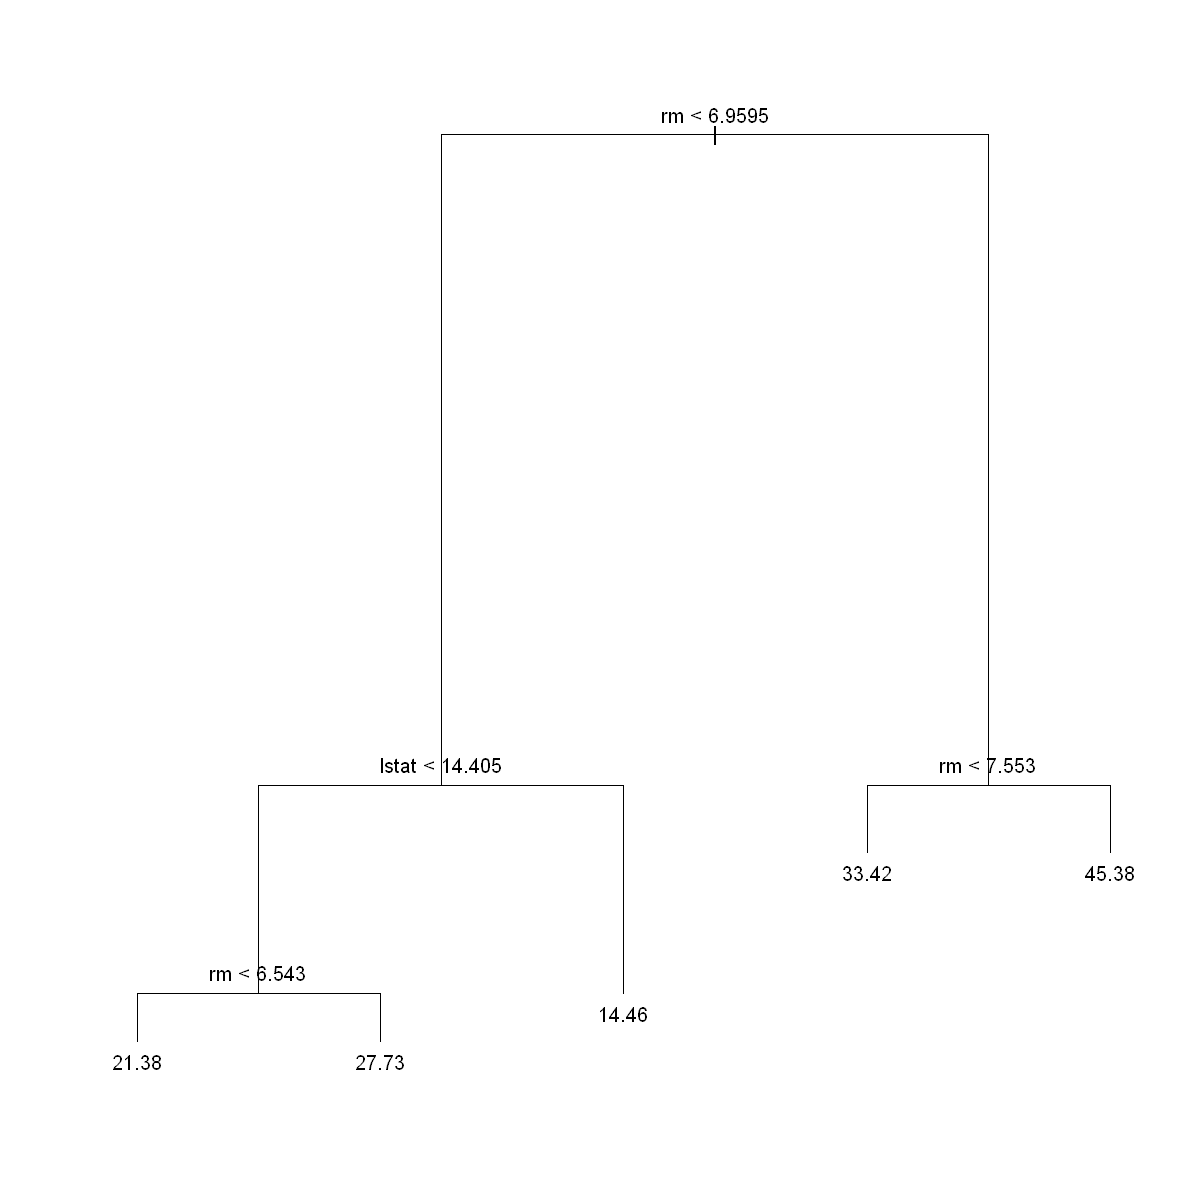

In [15]:
# 剪定
prune.boston = prune.tree(tree.boston, best=5)
plot(prune.boston)
text(prune.boston, pretty=0)

[1] 35.28688

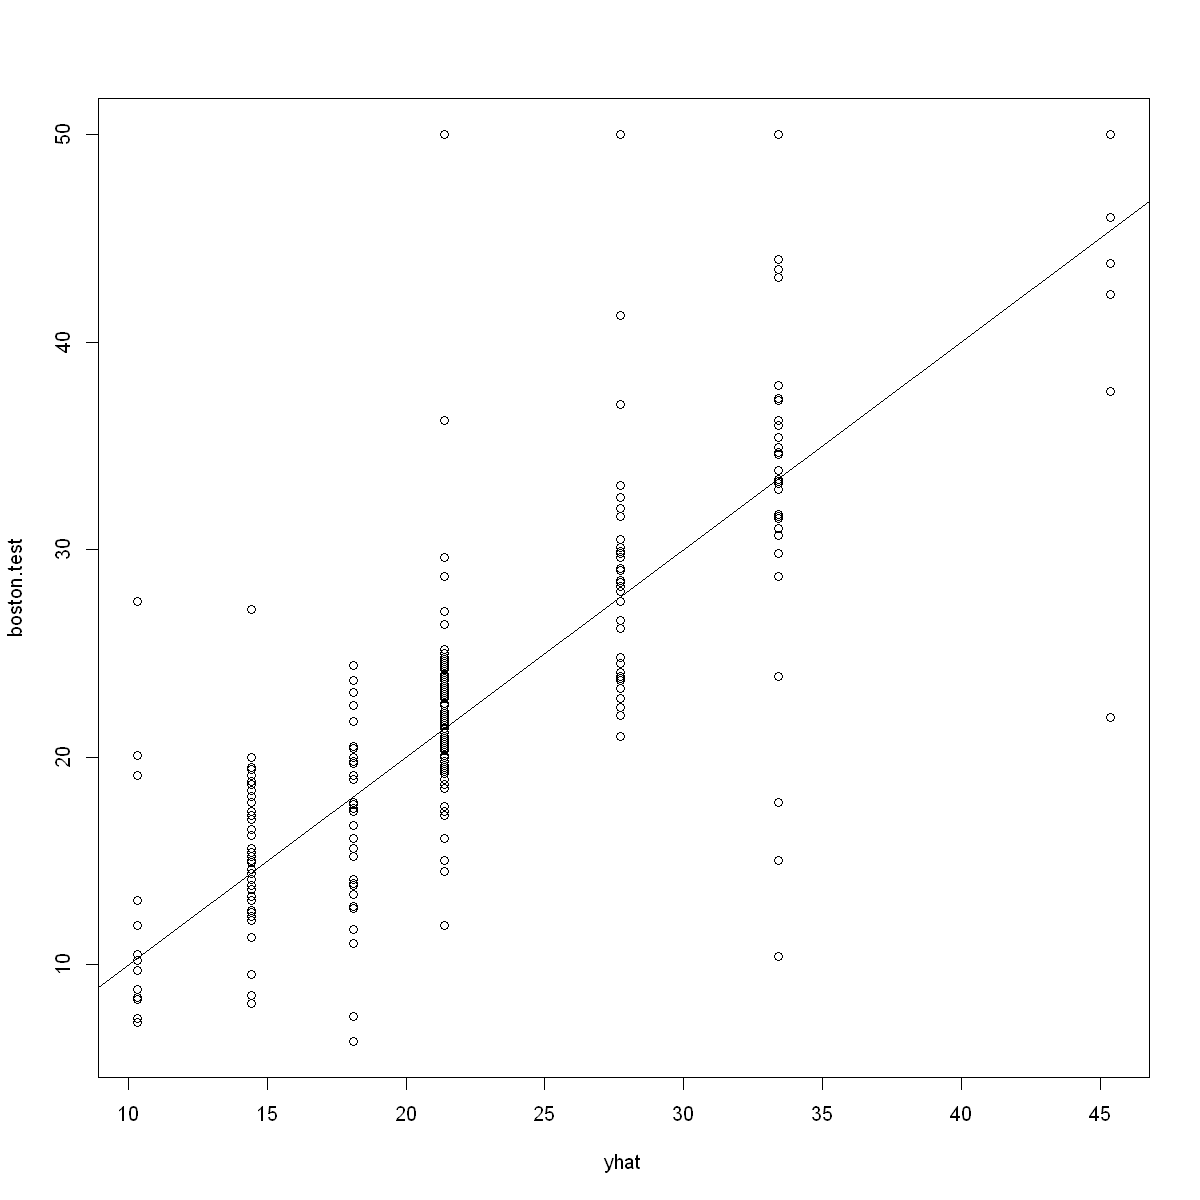

In [16]:
# クロスバリデーションの結果を維持する場合
yhat = predict(tree.boston, newdata=Boston[-train, ])
boston.test = Boston[-train, "medv"]
plot(yhat, boston.test)
abline(0, 1)
mean((yhat - boston.test)^2)

## 2. Bagging, Random Forests, Boosting

### 1. Bagging

決定木は分散が大きいが，Bootstrapを応用したBaggingによって統計的な学習手法の分散を小さくする。

例えば，n個の独立した観測$Z_1, \dots, Z_n$のそれぞれの分散を$\sigma$とする。分散の平均を$\bar{Z}$とすると，$\bar{Z} = \sigma^2 / n$となる。一連の観測の平均をとることにより，分散を小さくすることができるのである。よって，母集団からたくさんの訓練データを使用して，それぞれ別々の予測モデルを構築し，予測結果の平均をとればよい。

バギングは，bootstrapでたくさんのデータセットを生成する。  
分散を小さくするために，$\hat{f}^1(x), \hat{f}^2(x), \dots, \hat{f}^b(x)$を求めて平均する。
$$
\hat{f}^{avg}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^b(x)
$$
一般的に複数の訓練セットを利用する必要はないので，これでは実用的ではない。その代わり，同じ訓練セットから何度もサンプルを入手する。そのため，bootstrapで入手したデータより$\hat{f}^{*b}(x)$を作成する。つまり，
$$
\hat{f}^{bag}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^{*b}(x)
$$
これがバギングである。

バギングは他の手法でも利用できるが，分散が大きくバイアスが小さい決定木の分散を小さくするので，決定木に特に有効である。また，分類問題に対しては，B個の決定木の結果で最も多かった結果を採用すればよい。

### 2. Random Forests
Random Forestsでは各ブートストラップサンプルに対しランダムに選択された$m$（$m \approx \sqrt{p}$とすることが多い）個の変数を使って決定木をサンプルの個数分作る．  
これは使用できる主要な変数すら考慮から省く方法である。分類に重要な変数はバギングでも最初の分岐として使われる。そのため，結果的にバギングと非常に似たツリーとなる。

Baggingと比べて変数の数が少ないので，結果的に，各木の分散が小さくなって良い．

In [17]:
# Bagging and Random Forests
library(randomForest)
set.seed(1)
bag.boston = randomForest(medv~., data=Boston, subset=train, mtry=13, importance=TRUE)
print(bag.boston)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.39601
                    % Var explained: 85.17


[1] 23.59273

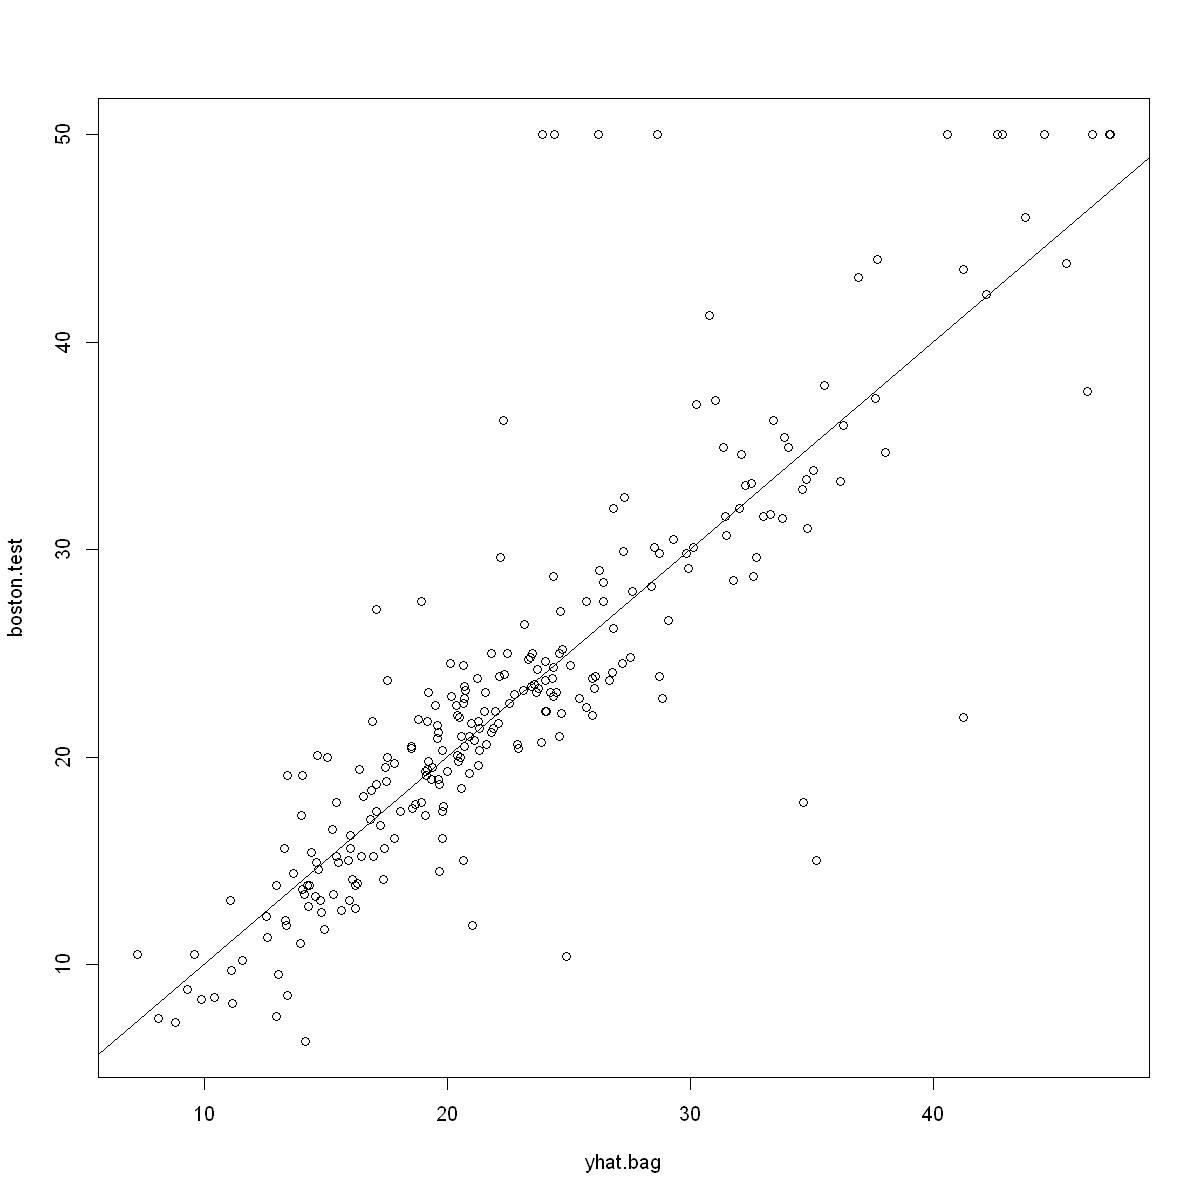

In [18]:
# MSE
yhat.bag = predict(bag.boston, newdata=Boston[-train, ])
plot(yhat.bag, boston.test)
abline(0, 1)
mean((yhat.bag - boston.test)^2)

In [19]:
# ツリーの数を指定
bag.boston = randomForest(medv~., data=Boston, subset=train, mtry=13, ntree=25)
yhat.bag = predict(bag.boston, newdata=Boston[-train, ])
mean((yhat.bag - boston.test)^2)

[1] 23.66716

In [20]:
# 変数を√p個に変える
set.seed(1)
rf.boston = randomForest(medv~., data=Boston, subset=train, mtry=6, importance=TRUE)
yhat.rf = predict(rf.boston, newdata=Boston[-train, ])
mean((yhat.rf - boston.test)^2)
importance(rf.boston)

[1] 19.62021

,%IncMSE,IncNodePurity
crim,16.697017,1076.08786
zn,3.625784,88.35342
indus,4.968621,609.53356
chas,1.061432,52.21793
nox,13.518179,709.87339
rm,32.343305,7857.65451
age,13.272498,612.21424
dis,9.032477,714.94674
rad,2.878434,95.80598
tax,9.118801,364.92479


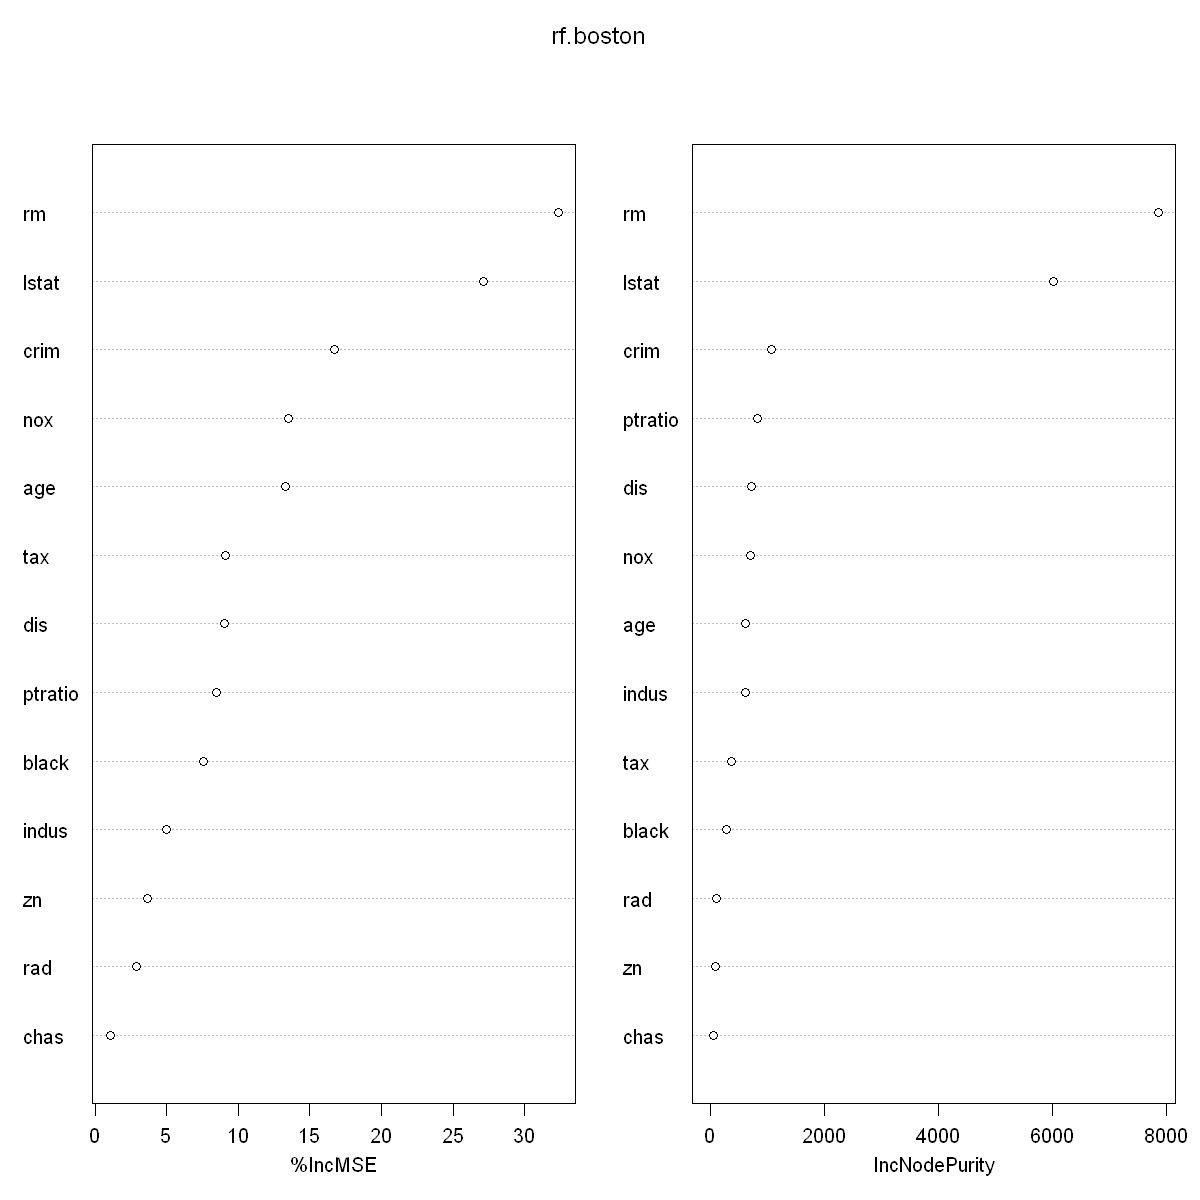

In [21]:
# 重要度の可視化
varImpPlot(rf.boston)

### 3. Boosting
BaggingやRandom Forestsのようなもの。  
これらは並列計算できるが，Boostingはその前のモデルに依存して新しいモデルが作られるので並列計算不可。また，Boostingは他の手法にも適用可能。

パラメタとしては縮小パラメータλ（よく使われるのは0.01もしくは0.001），サンプル数B（λが大きければBも大きい必要があるが，過学習しやすくなる），各木の分割数dの3種類．最適なBはクロス・バリデーションで決める。

回帰木に対するブースティングは以下の手順である。
1. Set $\hat{f}(x) = 0$ and $r_i=y_i$ for all i in the training set.
2. For b = 1, 2, ..., B, repeat:  
    (a)Fit a tree $\hat{f}^b$ with $d$ splits ($d + 1$ terminal nodes) to the training data $(X, r)$.   
    (b)Update $\hat{f}$ by adding in a shrunken version of the new tree:  
$$
\hat{f}(x) \leftarrow \hat{f}(x) + \lambda \hat{f}^b(x). \tag{8.10}
$$  
    (c)Update the residuals,  
$$
r_i \leftarrow r_i - \lambda \hat{f}^b(x_i). \tag{8.11}
$$
3. Output the boosted model,
    $\hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b(x). \tag{8.12}$

Loaded gbm 2.1.5


,var,rel.inf
,<fct>,<dbl>
rm,rm,43.9919329
lstat,lstat,33.1216941
crim,crim,4.2604167
dis,dis,4.0111090
nox,nox,3.4353017
black,black,2.8267554
age,age,2.6113938
ptratio,ptratio,2.5403035
tax,tax,1.4565654


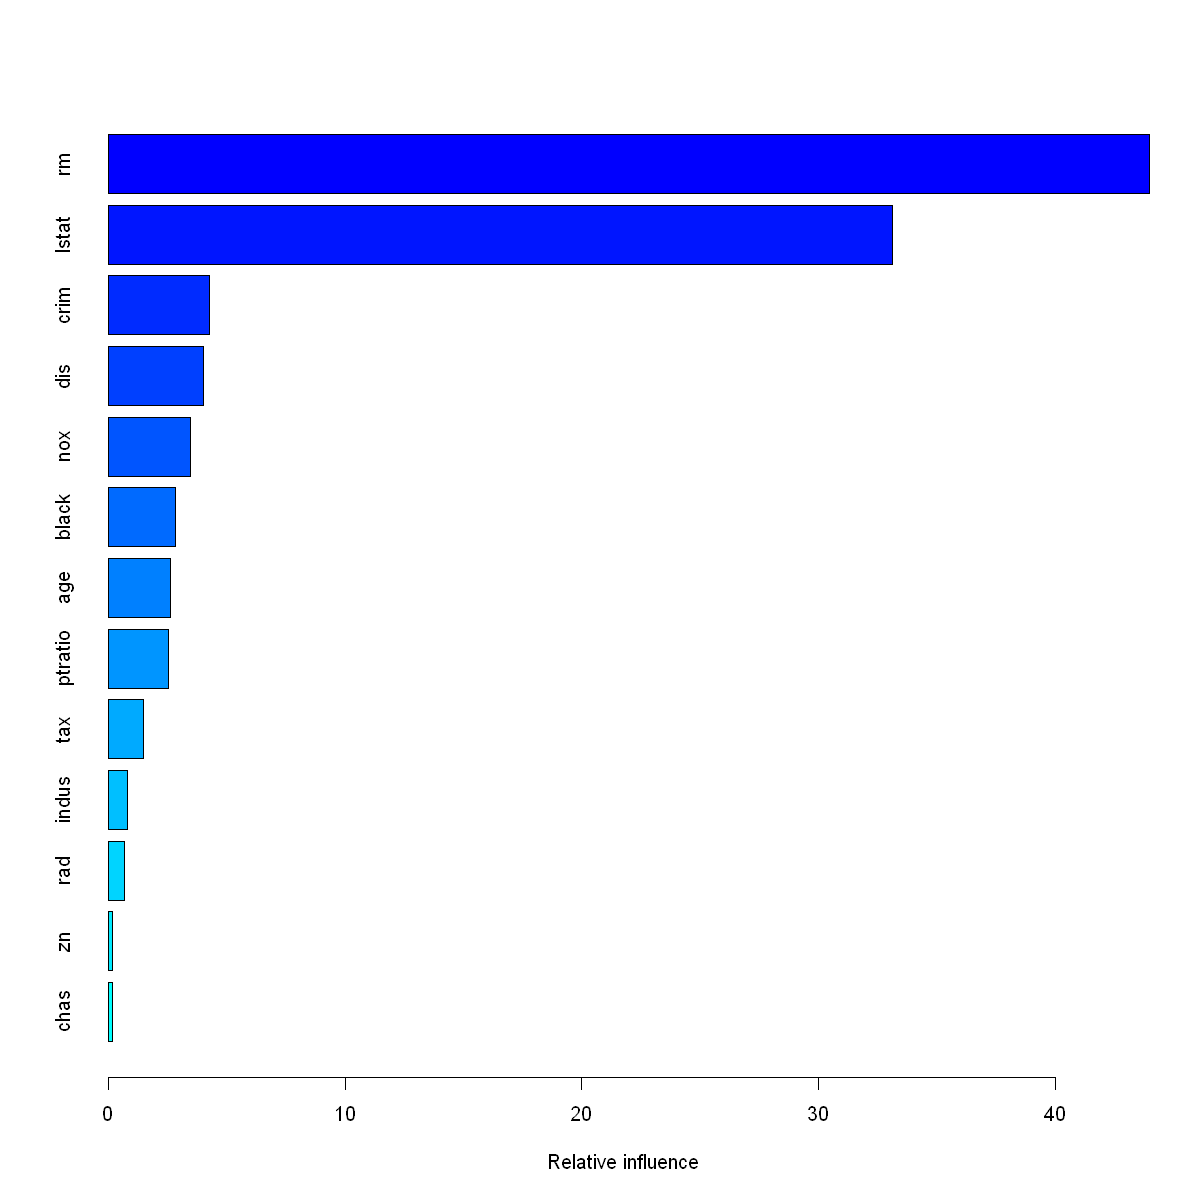

In [22]:
# Boosting
library(gbm)
set.seed(1)
boost.boston = gbm(medv~., data=Boston[train, ], distribution="gaussian", n.trees=5000, interaction.depth=4)
summary(boost.boston)

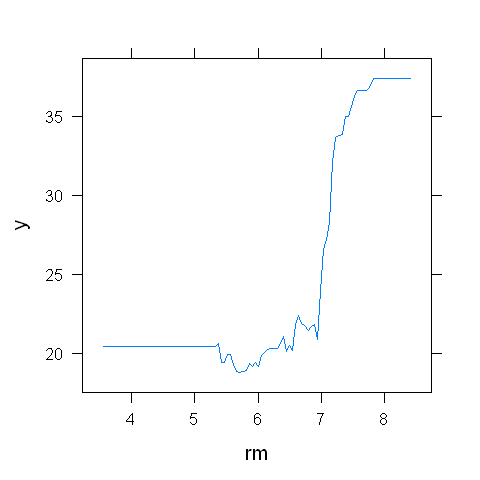

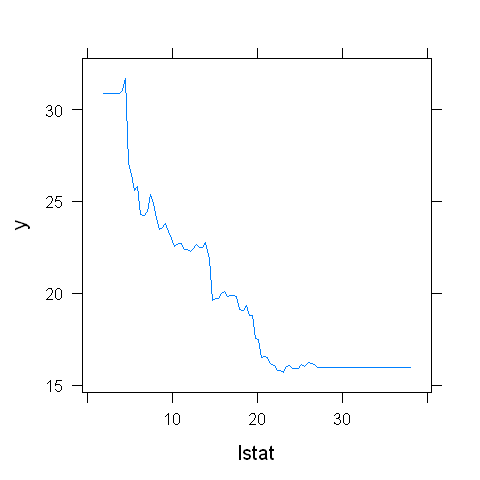

In [23]:
# plot
par(mfrow=c(1,2))
options(repr.plot.width=4, repr.plot.height=4) # jupyter用
plot(boost.boston, i='rm')
plot(boost.boston, i='lstat')

In [24]:
# デフォルトでは縮小パラメータ0.001
yhat.boost = predict(boost.boston, newdata=Boston[-train, ], n.trees=5000)
mean((yhat.boost - boston.test)^2)

[1] 18.84709

In [25]:
# 縮小パラメータを0.2にする
boost.boston = gbm(medv~., data=Boston[train, ], distribution="gaussian", n.trees=5000, interaction.depth=4, shrinkage=0.2, verbose=F)
yhat.boost = predict(boost.boston, newdata=Boston[-train, ], n.trees=5000)
mean((yhat.boost - boston.test)^2)

[1] 18.33455

## 4. Exercises

1. 2次元領域と決定木の関連を図示すればいいと思われる。
   ![ fig8E_1 ](./fig8E_1.jpg)

2. Algorithm 8.2（回帰木に対するブースティング）の手順より，
$$
\hat{f}(x) = 0, r_i = y_i \\
\hat{f}^1(x) = {\beta_1}_1 I(X_1 < t_1) + {\beta_0}_1 \\
\hat{f}(x) = \hat{f}(x) + \lambda \hat{f}^1(x) \\
r_i = y_i - \lambda \hat{f}^1(x_i)
$$
   以上を繰り返すことより，
$$
\hat{f}^j(x) = {\beta_1}_j I(X_j < t_j) + {\beta_0}_j \\
\hat{f}(x) = \hat{f}(x) + \lambda \hat{f}^1(x) + \cdots + \lambda \hat{f}^p(x)
$$
   よって，
$$
f(X) = \sum_{j=1}^p f_j(X_j)
$$
   の形になる。したがって，式（8.12）から始めることができるようになる。

3. x軸に$\hat{p}_{m1}$，y軸にジニ係数，分類誤差，エントロピーを描画する。クラス数は2までなので，次のように関数を作成すれば描画できる。

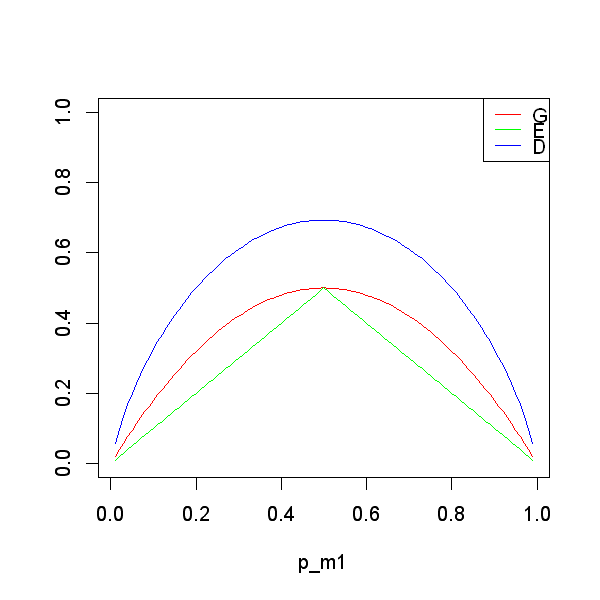

In [26]:
# Exercises 3
p_m1 = seq(0.01, 0.99, length=99)
p_m2 = 1 - p_m1 # ヒントより
Gini_index = p_m1 * (1 - p_m1) + p_m2 * (1 - p_m2) # 式（8.5）
classification_error = 1 - apply(rbind(p_m1, p_m2), 2, max) # 式（8.6）
entropy = - p_m1 * log(p_m1) - p_m2 * log(p_m2) # 式（8.7）

# plot
options(repr.plot.width=5, repr.plot.height=5) # jupyter用
plot(p_m1, Gini_index, type='l', col=rgb(1, 0, 0), ylab="", ylim=c(0, 1))
par(new=T)
plot(p_m1, classification_error, type='l', col=rgb(0, 1, 0), ylab="", ylim=c(0, 1))
par(new=T)
plot(p_m1, entropy, type='l', col=rgb(0, 0, 1), ylab="", ylim=c(0, 1))

# 凡例を表示
legend("topright", legend = c("G", "E", "D"), col = c(rgb(1, 0, 0), rgb(0, 1, 0), rgb(0, 0, 1)), lty = c(1, 1, 1))

4. こういうことだと思われる。

|(a)|(b)|
|---|---|
|![ fig8E_4a ](./fig8E_4a.jpg)|![ fig8E_4b ](./fig8E_4b.jpg)|

5. 今回何度も行ってきたcut-off関数が今回の主要な方法で，平均をとっての分類が第二の方法である。

In [27]:
# cut-off（今回の基準は0.5）
data = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
print(table(data > 0.5))

# average
threshold = mean(data)
print(c("average", threshold))
print(table(data > threshold))


FALSE  TRUE 
    4     6 
[1] "average" "0.45"   

FALSE  TRUE 
    4     6 


6. 回帰木のアルゴリズムについて


1. 説明変数$X_1, X_2, \dots, X_p$を，重複がないように切り分ける。このとき，$RSS (= \sum_{j=1}^J\sum_{i\in R_j}(y_i - \hat{y}_{R_j})^2)$が最も小さくなる数値を基準とする。ここで，$\hat{y}_{R_j}$は$R_j$に属する説明変数の平均値であり，決定木の予測値となる。
2. 各終端ノードの中の観測データの個数が一定数以下になるまで領域を分割する。

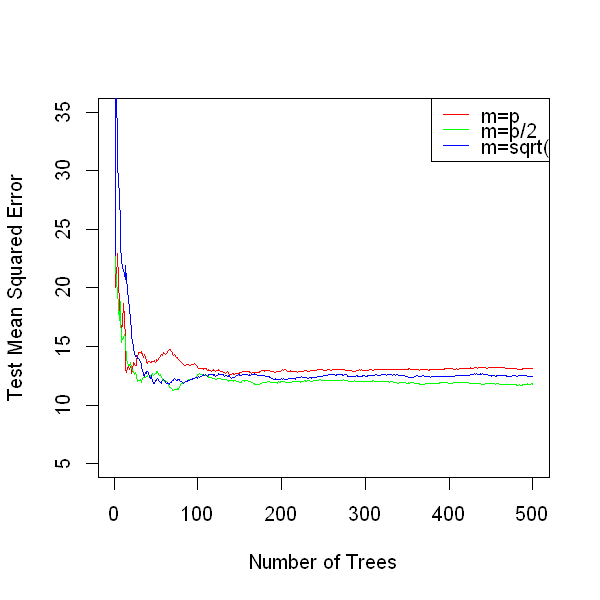

In [28]:
# 7

# 図8.10と似た図を作成（そもそも回帰ランダムフォレストしかできなくて困る）
train = sample(1:nrow(Boston), nrow(Boston)/2) # 訓練データ
ntree = 500 # 予測値の個数
m_1 = floor(length(Boston) - 1) # medv以外の変数と同じ個数
m_2 = floor(m_1 / 2)
m_3 = floor(sqrt(m_1))
rf1.boston = randomForest(medv~., data=Boston, subset=train, mtry=m_1, ntree=500)
rf2.boston = randomForest(medv~., data=Boston, subset=train, mtry=m_2, ntree=500)
rf3.boston = randomForest(medv~., data=Boston, subset=train, mtry=m_3, ntree=500)

options(repr.plot.width=5, repr.plot.height=5) # jupyter用
plot(1:500, rf1.boston$mse, col="red", type = "l", xlab="Number of Trees", ylab = "Test Mean Squared Error", ylim=c(5, 35))
lines(1:500, rf2.boston$mse, col="green", type = "l")
lines(1:500, rf3.boston$mse, col="blue", type = "l")
legend("topright", c("m=p", "m=p/2", "m=sqrt(p)"), col = c("red", "green", "blue"), cex = 1, lty = 1)


Regression tree:
tree(formula = Sales ~ ., data = Carseats, subset = train)
Variables actually used in tree construction:
[1] "High"        "ShelveLoc"   "Price"       "CompPrice"   "Income"     
[6] "Advertising"
Number of terminal nodes:  10 
Residual mean deviance:  1.659 = 315.3 / 190 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.3940 -0.9108  0.0535  0.0000  0.9275  3.1570 

[1] "MSE ="            "2.71065404265565"


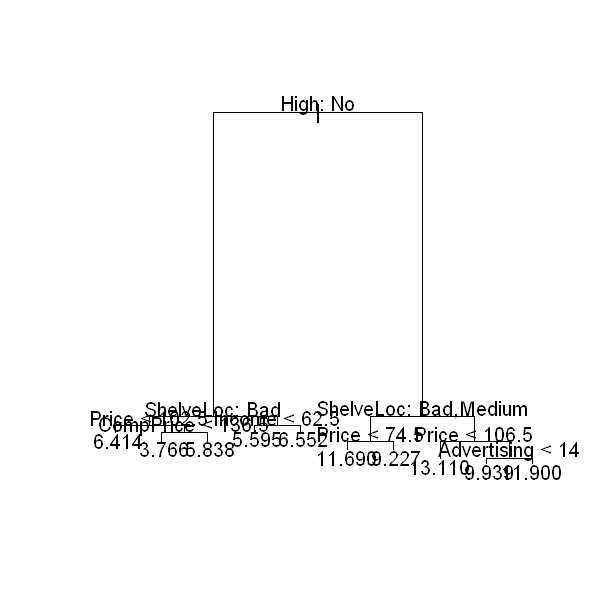

In [29]:
# 8

# (a)
set.seed(1001)
train = sample(1:nrow(Carseats), nrow(Carseats)/2) # 訓練データ
Carseats.train = Carseats[train, ]
Carseats.test = Carseats[-train, ]

# (b)
tree.Carseats = tree(Sales~., Carseats, subset=train)
summary(tree.Carseats)
pred.Carseats = predict(tree.Carseats, Carseats.test)
mse = mean((pred.Carseats - Carseats.test$Sales)^2)
print(c("MSE =", mse))
plot(tree.Carseats)
text(tree.Carseats, pretty=0)

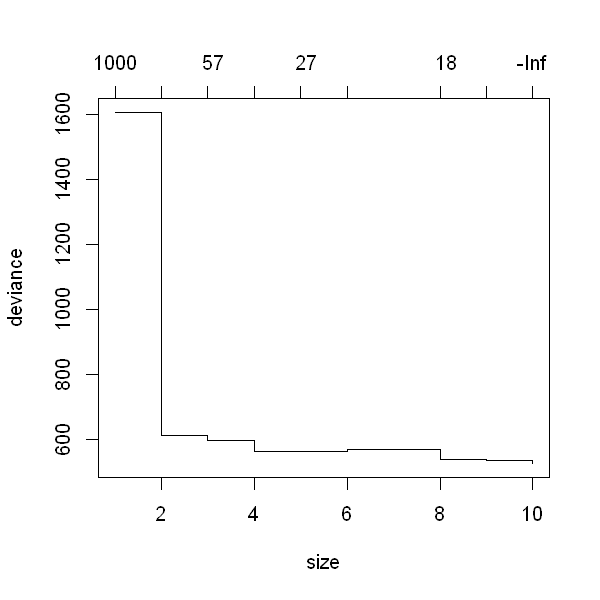

In [30]:
# (c)
set.seed(1001)
cv.Carseats = cv.tree(tree.Carseats)
plot(cv.Carseats)

[1] "MSE ="          "2.758974598978"


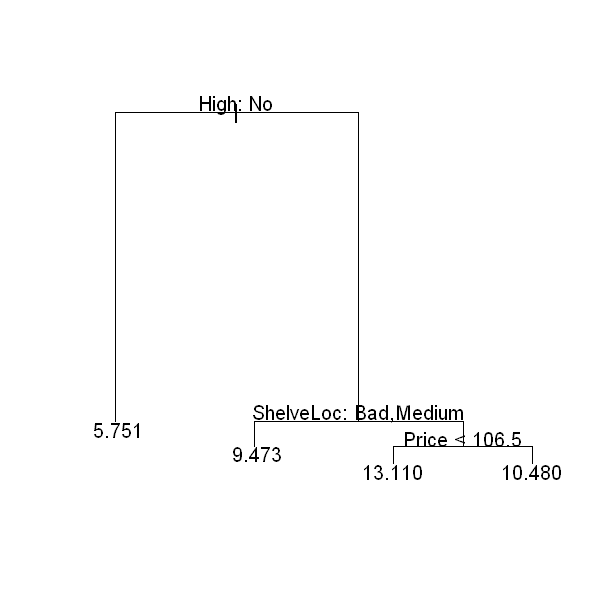

In [31]:
prune.Carseats = prune.tree(tree.Carseats, best=4)
pred.Carseats = predict(prune.Carseats, Carseats.test)
mse = mean((pred.Carseats - Carseats.test$Sales)^2)
print(c("MSE =", mse))
plot(prune.Carseats)
text(prune.Carseats, pretty=0)

In [32]:
# (d)
bag.Carseats = randomForest(Sales~., data=Carseats, subset=train, mtry=11, importance=TRUE) # m = pだとバギング
pred.Carseats = predict(bag.Carseats, Carseats.test)
mse = mean((pred.Carseats - Carseats.test$Sales)^2)
print(c("MSE =", mse))
print(importance(bag.Carseats))
# High Low がめっちゃ効いていることがわかる

[1] "MSE ="            "2.14990611478582"
               %IncMSE IncNodePurity
CompPrice   12.0467104     71.960464
Income       7.6303882     59.752064
Advertising  6.1202801     45.831485
Population   0.1264980     50.541899
Price       23.8659645    140.574761
ShelveLoc   30.9662641    117.785774
Age         -1.8932220     40.194059
Education    2.9019985     32.995220
Urban       -0.6922199      3.202883
US           4.8665891      5.215959
High        84.3897845   1008.392445


In [33]:
# (e)
rf.Carseats = randomForest(Sales~., data=Carseats, subset=train, mtry=3, importance=TRUE) # m = sqrt(p)
pred.Carseats = predict(rf.Carseats, Carseats.test)
mse = mean((pred.Carseats - Carseats.test$Sales)^2)
print(c("MSE =", mse))
print(importance(rf.Carseats))

[1] "MSE ="            "2.09563152244111"
               %IncMSE IncNodePurity
CompPrice    8.6758208      86.10078
Income       4.9434408      86.41465
Advertising  7.8728401      91.78073
Population  -1.0019546      68.46907
Price       19.2664684     222.98074
ShelveLoc   22.3659335     231.96544
Age          2.6165937      74.61130
Education    0.3618179      53.84593
Urban       -1.0802392      10.59577
US           3.8882136      15.94816
High        49.5562458     583.29302


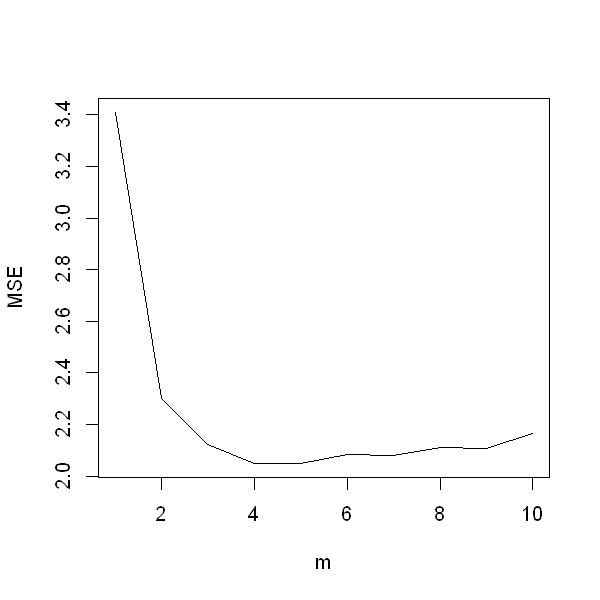

In [34]:
mses = c()
for (i in 1:10){
    rf.Carseats = randomForest(Sales~., data=Carseats, subset=train, mtry=i, importance=TRUE)
    pred.Carseats = predict(rf.Carseats, Carseats.test)
    mse = mean((pred.Carseats - Carseats.test$Sales)^2)
    mses = append(mses, mse)
}
plot(1:10, mses, type='l', xlab='m', ylab='MSE')

In [35]:
# 9
if(0){
    斬新なコメントアウトの書き方
    使用するデータはOJ
    変数にドットを使うのはPythonだと有り得ないのでアンダーバーに変更
}

#### OJについて
[ Orange Juice Data ](https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/OJ.html)

In [36]:
# a
set.seed(1001)
train = sample(1:nrow(OJ), 800)
OJ_train = OJ[train, ]
OJ_test = OJ[-train, ]

In [37]:
# b
OJ_tree = tree(Purchase~., data=OJ)
print(summary(OJ_tree))


Classification tree:
tree(formula = Purchase ~ ., data = OJ)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7571 = 804 / 1062 
Misclassification error rate: 0.1636 = 175 / 1070 


In [38]:
print(OJ_tree)

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 1070 1431.00 CH ( 0.61028 0.38972 )  
   2) LoyalCH < 0.5036 469  559.30 MM ( 0.28358 0.71642 )  
     4) LoyalCH < 0.276142 223  164.60 MM ( 0.12108 0.87892 )  
       8) LoyalCH < 0.0356415 75   10.62 MM ( 0.01333 0.98667 ) *
       9) LoyalCH > 0.0356415 148  137.60 MM ( 0.17568 0.82432 ) *
     5) LoyalCH > 0.276142 246  336.30 MM ( 0.43089 0.56911 )  
      10) PriceDiff < 0.05 101  105.90 MM ( 0.21782 0.78218 ) *
      11) PriceDiff > 0.05 145  197.30 CH ( 0.57931 0.42069 ) *
   3) LoyalCH > 0.5036 601  475.20 CH ( 0.86522 0.13478 )  
     6) LoyalCH < 0.764572 251  289.20 CH ( 0.73705 0.26295 )  
      12) PriceDiff < -0.165 40   48.87 MM ( 0.30000 0.70000 ) *
      13) PriceDiff > -0.165 211  199.00 CH ( 0.81991 0.18009 )  
        26) ListPriceDiff < 0.135 34   47.02 CH ( 0.52941 0.47059 ) *
        27) ListPriceDiff > 0.135 177  132.90 CH ( 0.87571 0.12429 ) *
     7) LoyalCH > 0.764572 350  123.

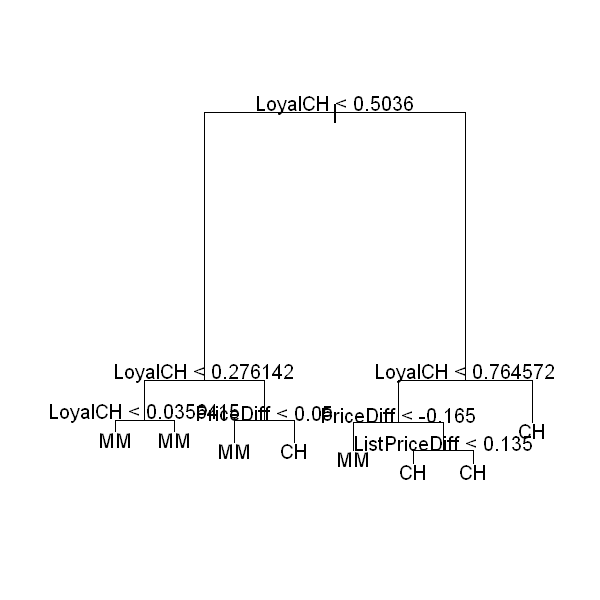

In [39]:
# d
plot(OJ_tree)
text(OJ_tree, pretty=0)

In [40]:
# e
OJ_pred = predict(OJ_tree, OJ_test, type='class') # 数値ではなくCHかMMかを出力するにはtype='class'
table(OJ_pred, OJ_test[,'Purchase'])

       
OJ_pred  CH  MM
     CH 147  28
     MM  18  77

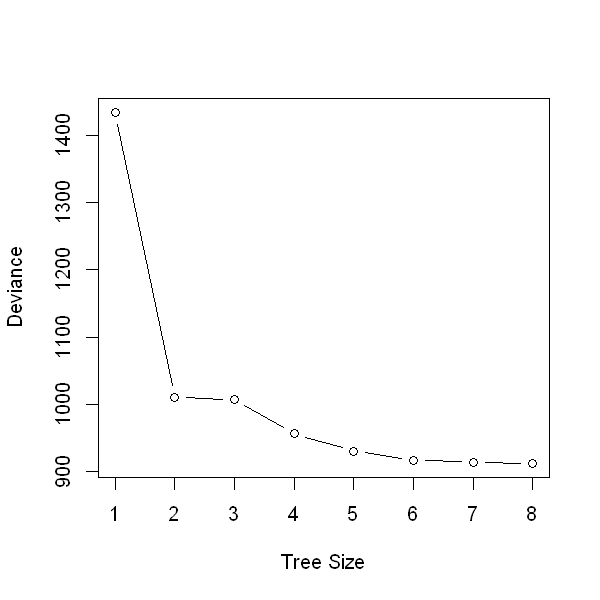

In [41]:
# fからh
OJ_cv_tree = cv.tree(OJ_tree)
plot(OJ_cv_tree$size, OJ_cv_tree$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")
# 下げ止まりはntree=6?

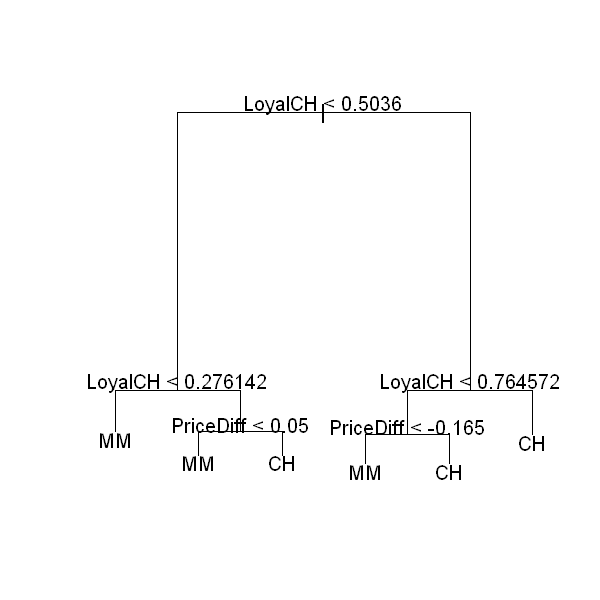

In [42]:
# i
OJ_prune_tree = prune.tree(OJ_tree, best=6)
plot(OJ_prune_tree)
text(OJ_prune_tree, pretty=0)

In [43]:
# j, k
OJ_prune_pred = predict(OJ_prune_tree, OJ_test, type='class')
summary(OJ_tree)
summary(OJ_prune_tree)
# error rateが一緒…


Classification tree:
tree(formula = Purchase ~ ., data = OJ)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7571 = 804 / 1062 
Misclassification error rate: 0.1636 = 175 / 1070 


Classification tree:
snip.tree(tree = OJ_tree, nodes = c(4L, 13L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.789 = 839.5 / 1064 
Misclassification error rate: 0.1636 = 175 / 1070 

In [44]:
# 10

# a
Hitters = Hitters[-which(is.na(Hitters$Salary)), ]
Hitters$Salary = log(Hitters$Salary)

In [45]:
# b
set.seed(1001)
train = sample(1:nrow(Hitters), 200)
Hitters_train = Hitters[train, ]
Hitters_test = Hitters[-train, ]

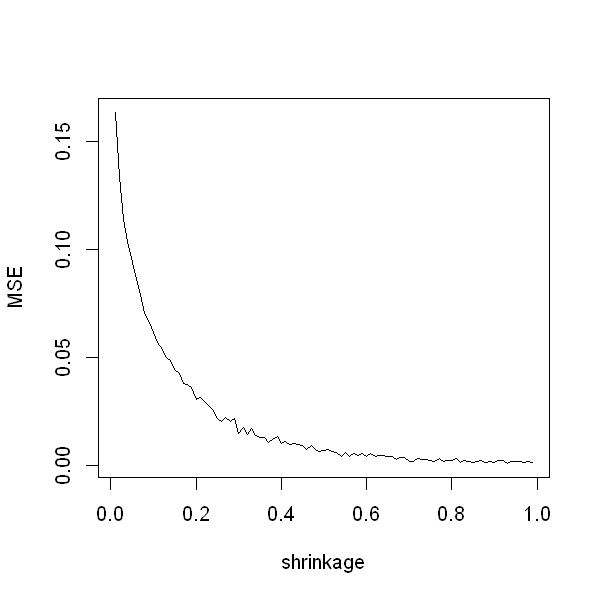

In [46]:
# c
lambda = seq(0.01, 0.99, 0.01)
mses = c()
for (i in lambda){
    Hitters_boost = gbm(Salary~., data=Hitters_train, n.trees=1000, shrinkage=i, distribution = "gaussian")
    pred_Hitters = predict(Hitters_boost, Hitters_train, n.trees=1000)
    mse = mean((pred_Hitters - Hitters_train$Salary)^2)
    mses = append(mses, mse)
}

plot(lambda, mses, type='l', xlab='shrinkage', ylab='MSE')

[1] "lambda ="          "0.02"              "MSE"              
[4] "0.163417723510891"


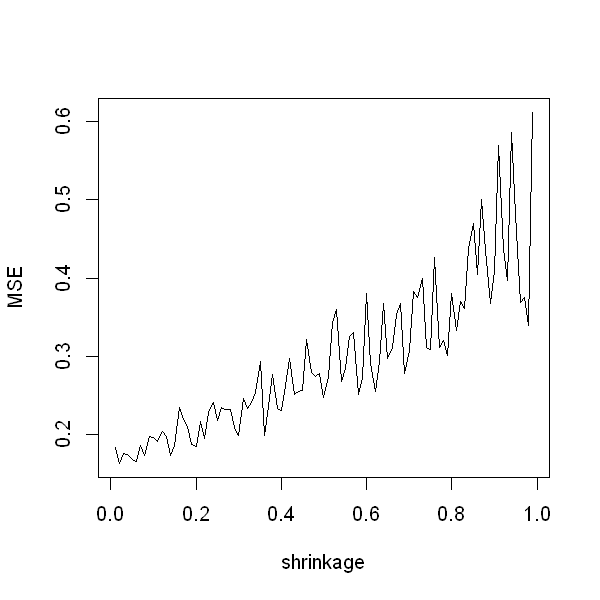

In [47]:
# d
mses = c()
for (i in lambda){
    Hitters_boost = gbm(Salary~., data=Hitters_train, n.trees=1000, shrinkage=i, distribution = "gaussian")
    pred_Hitters = predict(Hitters_boost, Hitters_test, n.trees=1000)
    mse = mean((pred_Hitters - Hitters_test$Salary)^2)
    mses = append(mses, mse)
}

plot(lambda, mses, type='l', xlab='shrinkage', ylab='MSE')
print(c('lambda =', lambda[which.min(mses)], 'MSE', min(mses)))

In [48]:
# e
library(glmnet)
library(Matrix)
library(foreach)

Hitters_lm = lm(Salary~., data=Hitters_train)
Hitters_pred_lm = predict(Hitters_lm, Hitters_test)
mse_lm = mean((Hitters_pred_lm - Hitters_test$Salary)^2)

x = model.matrix(Salary ~ ., data = Hitters_train)
y = Hitters_train$Salary
x_test = model.matrix(Salary ~ ., data = Hitters_test)
Hitters_ridge = glmnet(x, y, alpha = 0)
Hitters_pred_ridge = predict(Hitters_ridge, x_test)
mse_ridge = mean((Hitters_pred_ridge - Hitters_test$Salary)^2)

Hitters_lasso = glmnet(x, y, alpha = 1)
Hitters_pred_lasso = predict(Hitters_lasso, x_test)
mse_lasso = mean((Hitters_pred_lasso - Hitters_test$Salary)^2)

print(c('Linear', mse_lm))
print(c('Ridge', mse_ridge))
print(c('Lasso', mse_lasso))

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18



[1] "Linear"            "0.460670646098348"
[1] "Ridge"             "0.529009017880474"
[1] "Lasso"             "0.441572506726615"


,var,rel.inf
,<fct>,<dbl>
CAtBat,CAtBat,17.56511059
CHits,CHits,14.05130577
CRuns,CRuns,13.66840581
Years,Years,7.39481382
CWalks,CWalks,7.08963624
PutOuts,PutOuts,6.69217263
CRBI,CRBI,5.56853107
Hits,Hits,5.36689447
Walks,Walks,4.18087666


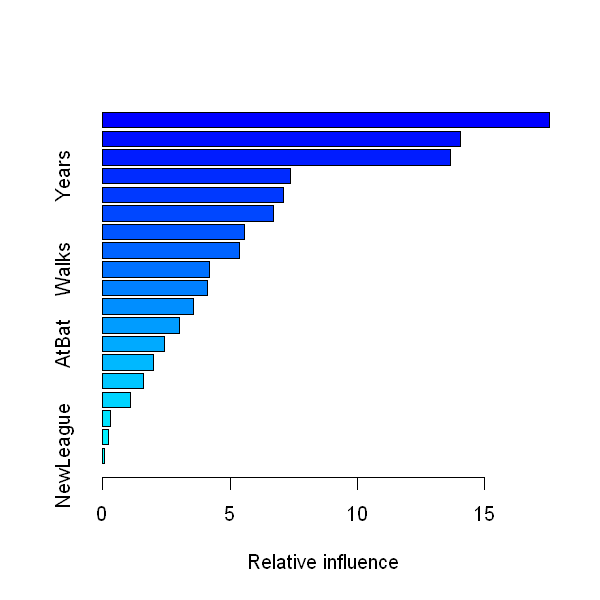

In [49]:
# f
Hitters_boost = gbm(Salary~., data=Hitters_train, n.trees=1000, shrinkage=0.02, distribution = "gaussian")
summary(Hitters_boost)
# 通算打数が最も重要な予測子である

In [50]:
# g
Hitters_bag = randomForest(Salary~., data=Hitters_train, mtry=19)
Hitters_pred_bag = predict(Hitters_bag, Hitters_test)
mse = mean((Hitters_pred_bag - Hitters_test$Salary)^2)
print(c('bagging', mse))

[1] "bagging"          "0.17934781550151"


In [51]:
# 11 a
Caravan = Caravan[-which(colnames(Caravan) %in% c("PVRAAUT", "AVRAAUT"))] # 0のみの無駄な変数を消す
Caravan$Purchase = ifelse(Caravan$Purchase == 'Yes', 1, 0) # boostingのオプションがdistribution = "bernoulli"の時は0と1にする
Caravan_train = Caravan[1:1000,]
Caravan_test = Caravan[-c(1:1000), ]

,var,rel.inf
,<fct>,<dbl>
PPERSAUT,PPERSAUT,15.3582430
MKOOPKLA,MKOOPKLA,9.4372590
MOPLHOOG,MOPLHOOG,6.6986480
MBERMIDD,MBERMIDD,5.7107500
ABRAND,ABRAND,5.0667926
PBRAND,PBRAND,4.7221385
MINK3045,MINK3045,4.4231578
MGODGE,MGODGE,4.1045545
MOSTYPE,MOSTYPE,2.8443684


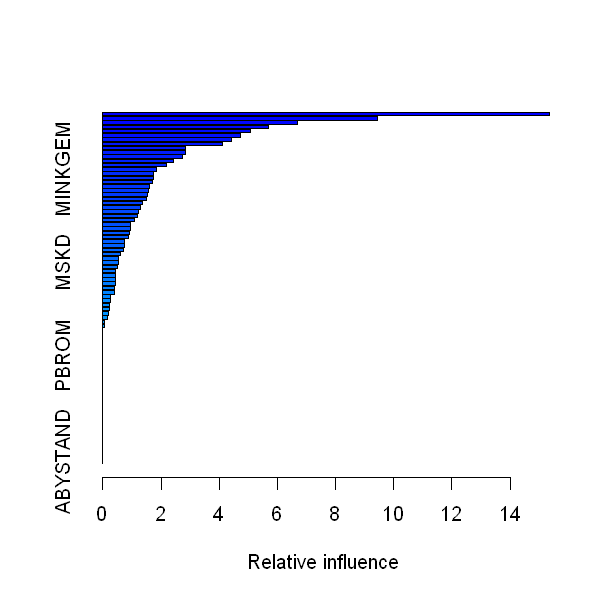

In [52]:
# b
set.seed(1001)
Caravan_boost = gbm(Purchase~., data=Caravan_train, n.trees=1000, shrinkage=0.01, distribution = "bernoulli")
summary(Caravan_boost)

In [53]:
# c
Caravan_pred = predict(Caravan_boost, Caravan_test, n.trees=1000, type='response')
Caravan_pred = ifelse(Caravan_pred > 0.2, 1, 0)
print(table(Caravan_test$Purchase, Caravan_pred))
print(mean(Caravan_test$Purchase == Caravan_pred))

   Caravan_pred
       0    1
  0 4405  128
  1  260   29
[1] 0.9195355


In [54]:
# KNN
library(class)
Caravan_train_s = scale(Caravan_train[, colnames(Caravan_train) != "Purchase"]) # Purchase以外のデータを標準化
Caravan_test_s = scale(Caravan_test[, colnames(Caravan_test) != "Purchase"])
Caravan_knn = knn(Caravan_train_s, Caravan_test_s, Caravan_train$Purchase, k=3)
print(table(Caravan_test$Purchase, Caravan_knn))
print(mean(Caravan_test$Purchase == Caravan_knn))

   Caravan_knn
       0    1
  0 4447   86
  1  270   19
[1] 0.9261717


In [55]:
# ロジスティック回帰
library(boot)
Caravan_log = glm(Purchase~., data=Caravan_train, family =binomial)
Caravan_pred_log = ifelse(predict(Caravan_log, Caravan_test) > 0.2, 1, 0)
print(table(Caravan_test$Purchase, Caravan_pred_log))
print(mean(Caravan_test$Purchase == Caravan_pred_log))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

   Caravan_pred_log
       0    1
  0 4451   82
  1  274   15
[1] 0.9261717


In [56]:
# 12 wageのデータを使って，MSEで比較（このデータはこのまま線形回帰などはできないので，それらの回帰は行わない）

# training & test
set.seed(82)
Wage = na.omit(Wage) # 不足分は削除
train = sample(1:nrow(Wage), nrow(Wage)/2)
Wage_train = Wage[train, ]
Wage_test = Wage[-train, ]

# boosting
Wage_boost = gbm(wage~., data=Wage_train, n.trees=1000, shrinkage=0.02, distribution = "gaussian")
Wage_pred_boost = predict(Wage_boost, Wage_test, n.trees=1000)
mse = mean((Wage_pred_boost - Wage_test$wage) ^ 2)
print(c('Boosting', mse))

# bagging
Wage_bag = randomForest(wage~., data=Wage_train, n.trees=1000, mtry=10) # 変数の数が11（そこからwage分を省く）
Wage_pred_bag = predict(Wage_bag, Wage_test, n.trees=1000)
mse = mean((Wage_pred_bag - Wage_test$wage) ^ 2)
print(c('Bagging', mse))

# random forest
Wage_rf = randomForest(wage~., data=Wage_train, n.trees=1000, mtry=3) # 10の平方根をとる
Wage_pred_rf = predict(Wage_rf, Wage_test, n.trees=1000)
mse = mean((Wage_pred_rf - Wage_test$wage) ^ 2)
print(c('Random Forest', mse))

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 6: region has no variation."

[1] "Boosting"         "3.11111693123059"
[1] "Bagging"          "1.10084843329756"
[1] "Random Forest"    "66.5901169494539"


**参考文献**  
kfumix, [ ISLR: Chapter 8 Tree-Based Methods ](http://kfumix.hatenablog.com/entry/2017/06/25/212754) (2019/6/4)